In [2]:
import scipy.io

# Load data
data = scipy.io.loadmat('data.mat')

# Print all keys in the .mat file
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'dt', 'dx', 'rawsection', 'wavelet'])


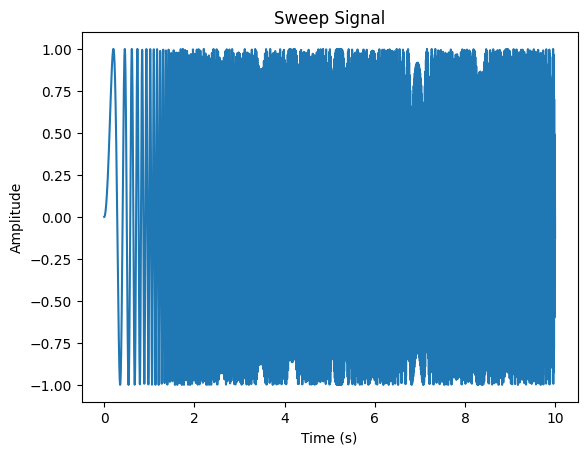

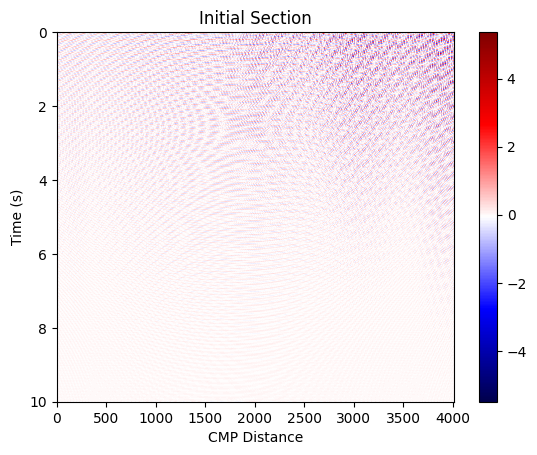

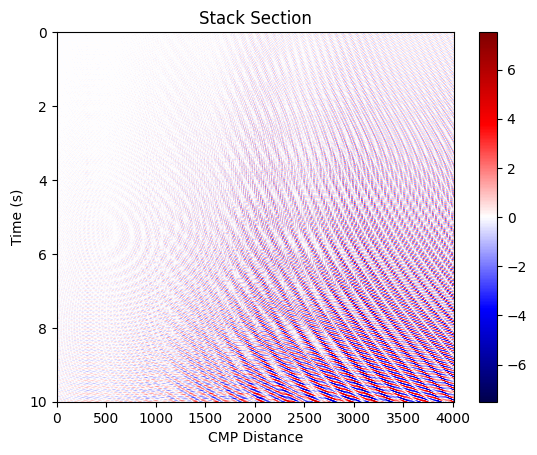

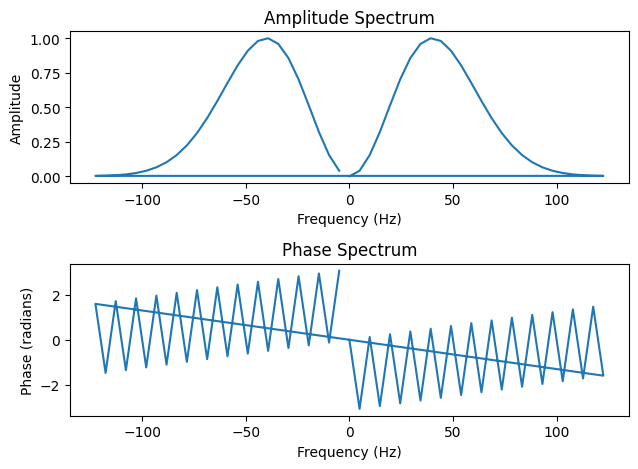

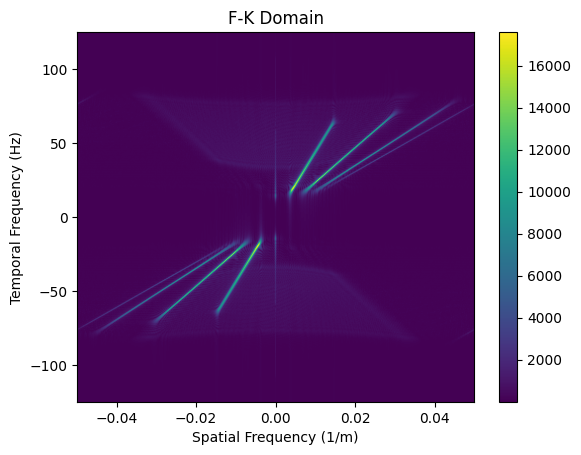

In [3]:
import numpy as np
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt

# Load the data
data = scipy.io.loadmat('data.mat')
dt = data['dt'][0][0]
dx = data['dx'][0][0]
rawsection = data['rawsection']
wavelet = data['wavelet']

# a) Generate and plot the sweep
t = np.arange(0, 10, dt)
f_max = 60  # Maximum frequency in Hz
sweep = np.sin(2 * np.pi * f_max * t**2 / 10)

plt.figure()
plt.plot(t, sweep)
plt.title('Sweep Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# b) Convolve sweep with section
initial_section = scipy.signal.convolve2d(rawsection, sweep[:, np.newaxis], mode='same')

plt.figure()
plt.imshow(initial_section, aspect='auto', cmap='seismic', extent=[0, initial_section.shape[1]*dx, 10, 0])
plt.title('Initial Section')
plt.xlabel('CMP Distance')
plt.ylabel('Time (s)')
plt.colorbar()
plt.show()

# c) Correlate and crop
stack_section = scipy.signal.correlate2d(rawsection, sweep[:, np.newaxis], mode='same')

plt.figure()
plt.imshow(stack_section, aspect='auto', cmap='seismic', extent=[0, stack_section.shape[1]*dx, 10, 0])
plt.title('Stack Section')
plt.xlabel('CMP Distance')
plt.ylabel('Time (s)')
plt.colorbar()
plt.show()

# d) Fourier transform of wavelet
wavelet_fft = np.fft.fft(wavelet.flatten())
freqs = np.fft.fftfreq(len(wavelet), dt)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(wavelet_fft))
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freqs, np.angle(wavelet_fft))
plt.title('Phase Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.tight_layout()
plt.show()

# e) 2D Fourier transform of stack section
stack_fft = np.fft.fft2(stack_section)
kx = np.fft.fftfreq(stack_section.shape[1], dx)
ky = np.fft.fftfreq(stack_section.shape[0], dt)

plt.figure()
plt.imshow(np.abs(np.fft.fftshift(stack_fft)), aspect='auto', extent=[kx.min(), kx.max(), ky.min(), ky.max()])
plt.title('F-K Domain')
plt.xlabel('Spatial Frequency (1/m)')
plt.ylabel('Temporal Frequency (Hz)')
plt.colorbar()
plt.show()
